# Lab 4: Predicting FCR with PyCaret

### 🧪Lab Overview
* Use PyCaret (v2.1) to predict **First Call Resolution (FCR)** for call center agents.

* FCR shows how well issues are resolved on the first call — **important for saving company costs**.

* **Perform EDA, run regression models, and explore classification** for performance trends.

* Work with a **real-world (sanitized) dataset** from a global BPO company.

### 📘 Lab Scenario

Imagine you're working with a global call center that handles millions of customer queries. The company wants to predict FCR for each employee so it can **improve service quality, reduce costs, and boost customer satisfaction**.

You are provided with **real anonymized data** from a major Business Process Outsourcer (BPO) supporting Fortune 500 clients.

### 🎯  Lab Goals
By the end of this lab, you will be able to:

* Build and evaluate a regression model using PyCaret.

* Predict the FCR score for a given employee.

* Understand how this prediction can be used to enhance performance management.

* Explore how machine learning can be applied to real business problems.

### 🧠 Key Concepts (for Beginners)
🔹 **First Call Resolution (FCR)**: FCR shows whether a customer’s issue was solved in the first call. Higher FCR = better support = lower cost.

🔹 **Regression**: A type of machine learning used to predict numbers (e.g., FCR score). It’s like drawing a best-fit line to estimate future values.

🔹 **Exploratory Data Analysis (EDA)**: EDA helps us understand the dataset before modeling. We explore trends, missing values, and patterns.

🔹 **PyCaret**: An easy-to-use ML library that automates model training, evaluation, and deployment with just a few lines of code.

#### **Step 1: Load Libraries**

In [1]:
!pip install seaborn


In [6]:
!pip show seaborn


Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\Hello\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [3]:
import sys
print(sys.executable)


C:\Users\Hello\myenv\Scripts\python.exe


In [4]:
# Import libraries for data processing.
import numpy as np       # For numerical operations
import pandas as pd      # For working with datasets (rows & columns)
import seaborn as sns    # Import Seaborn for data visualization
import warnings          # To suppress warnings and handle timing
import time
warnings.filterwarnings('ignore')

# Import libraries for visualization and set default values.
import matplotlib.pyplot as plt            # For creating graphs
import seaborn as sns                      # High-level plots with easy syntax
# Use the seaborn style with the 'darkgrid' context
sns.set_theme(style="darkgrid")            # Use a pleasant theme for better visuals
# or another available seaborn style

from sklearn import set_config
set_config(display='text')                 # Display pipeline steps in text format

### > ⚠️ **Note:**  
If you see an error like the one below during installation (while installing `pycaret` or its dependencies), you can **ignore it** if the rest of the code works fine.

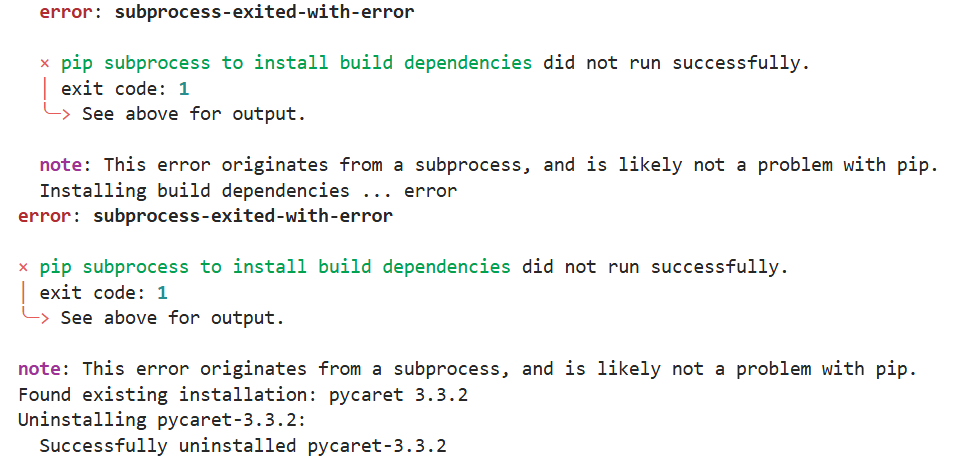


  error: subprocess-exited-with-error
  
  pip subprocess to install build dependencies did not run successfully.
  exit code: 1
  
  [78 lines of output]
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation == "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system != "AIX" and platform_python_implementation != "CPython"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system != "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_system == "AIX"' don't match your environment
  Ignoring numpy: markers 'python_version >= "3.8" and platform_system == "AIX"' don't match your environment
    Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
    Using cached wh

Confirm Pycaret version is 2.1.X?
Pycaret Version:  3.3.2
Shape of dataset (observations, features): (102, 19)


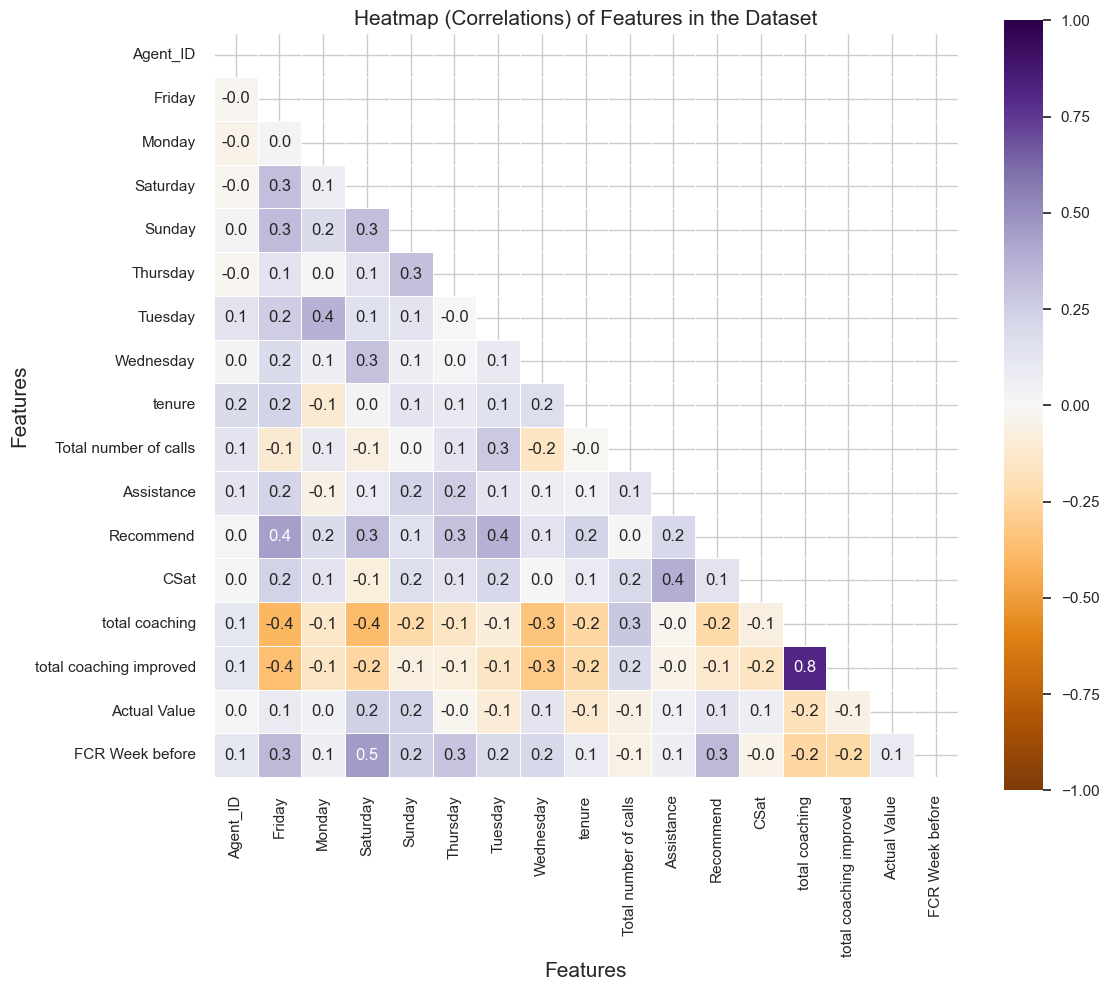

In [27]:
# Import libraries for data processing.
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')

# Import libraries for visualization and set default values.
import matplotlib.pyplot as plt
import seaborn as sns
# Use the seaborn style with the 'darkgrid' context
sns.set_theme(style="darkgrid")
# or another available seaborn style


from sklearn import set_config
set_config(display='text')

# Install the seaborn library for statistical data visualization
!pip install seaborn

# Install specific scikit-learn version compatible with Pycaret 2.1.x
!pip install scikit-learn==0.23.2 --quiet           
!pip install pycaret --quiet  # Install/reinstall pycaret   

# Install and import Pycaret library for transformation and classification.
!pip uninstall pycaret -y  # Uninstall pycaret if previously installed
!pip install pycaret --quiet # Reinstall pycaret
from pycaret.regression import * # Now import

# Confirm Pycaret version is 2.1
from pycaret.utils import version
print('Confirm Pycaret version is 2.1.X?')
print('Pycaret Version: ', version())

# Load Dataset.
url = 'https://raw.githubusercontent.com/aliagowani/Pycaret_2.1_Regression_EmployeePerformance/master/employee_performance.csv'
dataset = pd.read_csv(url)

# Check shape of dataset and view first few observations to ensure data loaded correctly.
print("Shape of dataset (observations, features):", dataset.shape)
dataset.head(5).round(2)

# Describe the features in the dataset, such as, count, mean, standard deviation, min, max, etc.
dataset.describe().round(2)

# Create a correlation for the dataset (exclude non-numeric columns)
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset_corr = dataset[numeric_cols].corr().round(4)

# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the correlation matrix (heatmap) using Seaborn
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center=0, vmin=-1,
                     square=True, cmap='PuOr', linewidths=.5,
                     annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

# Visualize the FCR for specific day in the probability density chart.
# ... (rest of the code remains the same) ...

#### Step 2: Load Dataset

In this step, we’ll load a **real-world Employee Performance dataset** that contains information about customer service agents in a call center. This data will help us build a machine learning model to predict **First Call Resolution (FCR)**.

**What is pd.read_csv()?**
* This function reads a CSV (Comma-Separated Values) file and turns it into a table (called a DataFrame) that we can analyze.

In [7]:
# Load Datasetm
url = 'https://raw.githubusercontent.com/aliagowani/Pycaret_2.1_Regression_EmployeePerformance/master/employee_performance.csv'
dataset = pd.read_csv(url)

In [8]:
# Check shape of dataset and view first few observations to ensure data loaded correctly.
print("Shape of dataset (observations, features):", dataset.shape)
dataset.head(5).round(2)

Shape of dataset (observations, features): (102, 19)


,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Site,Function_Field,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before
0,384091,100.00,90.00,90.00,96.15,100.00,96.88,100.00,Kuala Lumpur,Agent,33,163,95.06,94.23,4.87,0,0,85.71,97.14
1,369185,94.00,100.00,96.87,96.87,96.10,95.89,98.33,Kuala Lumpur,Agent,33,306,95.08,94.67,4.83,0,0,100.00,88.64
2,360854,94.44,80.00,92.94,92.94,100.00,93.94,96.30,Kuala Lumpur,Agent,32,138,94.16,94.74,4.82,2,1,80.00,92.31
3,374407,100.00,95.00,96.63,96.63,92.50,95.65,100.00,Kuala Lumpur,Agent,32,148,98.65,95.83,4.84,0,0,94.44,100.00
4,372496,96.88,95.83,94.28,94.28,83.33,95.35,100.00,Kuala Lumpur,Agent,29,142,97.18,98.55,4.86,0,0,100.00,90.91


#### Step 3: Exploratory Data Analysis (EDA)

In [10]:
# Below is a high-level description of each feature. The data set is comprised of 102 agents and we have 19 features to evaluate. The data is between the time period of June 1, 2020 and July 31, 2020, with the 'Actual Value' as the Actual FCR value of each agent for August 7, 2020. The goal is to create a model that predicts the FCR for an employee can have at the end of the week (Friday).

# 'Agent_ID': unique identifier of the employee or agent.
# 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday': shows the FCR percent for each agent as an aggregate (mean). The higher the percentage the higher the rate at which the customer's issue was resolved in the first call.
# 'Site': city location of the call center.
# 'Function_Field': this is the role of the employee. In our case, it should all be Agents.
# 'tenure': tenure of the agent at the company in months.
# 'Total number of calls': number of all phone calls taken by the agent in the given timeframe.
# 'Assistance': percentage of time the agent needed to provide additional assistance by escalating to supervisor.
# 'Recommend': percentage of time the agent would be recommended by the customer to resolve an issue.
# 'CSat': average survey response (on a scale from 1 (least satisfied) to 5 (most satisfied)) that the customer was satisfied with the experience.
# 'total coaching': number of times the agent received coaching sessions from supervisor to improve FCR metric in the given timeframe.
# 'total coaching improved': number of times the agent's FCR value increased after a week from the initial coaching.
# 'Actual Value': the label we are trying to predict. It is the next Friday (August 7, 2020) FCR value for the agent.
# 'FCR Week before': a strong indicator is how well the agent performed the previous Friday. This is the FCR value for the Friday before the predicted value ('Actual Value').

# Describe the features in the dataset, such as, count, mean, standard deviation, min, max, etc.
dataset.describe().round(2)

,Agent_ID,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,tenure,Total number of calls,Assistance,Recommend,CSat,total coaching,total coaching improved,Actual Value,FCR Week before
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,371097.88,95.65,94.10,95.55,95.19,94.91,94.97,96.54,14.24,173.94,95.83,95.62,4.81,1.61,0.88,96.04,95.58
std,10742.44,4.36,10.47,3.56,3.94,5.45,4.68,3.83,6.85,77.23,1.78,2.00,0.09,1.78,1.07,5.70,4.67
min,353039.00,77.78,0.00,80.56,80.00,75.00,80.00,83.33,3.00,52.00,89.66,87.16,4.41,0.00,0.00,75.00,80.00
25%,362108.00,93.75,92.45,93.87,93.28,92.31,92.94,95.00,8.00,116.25,94.71,94.67,4.77,0.00,0.00,94.12,92.92
50%,371781.00,96.15,94.94,95.83,96.01,96.00,95.86,97.33,15.00,158.00,95.81,95.59,4.82,1.00,1.00,100.00,96.49
75%,380697.75,100.00,100.00,97.56,97.57,100.00,98.15,100.00,17.00,226.25,96.99,97.11,4.87,2.00,1.00,100.00,100.00
max,388627.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,33.00,388.00,100.00,100.00,4.98,9.00,4.00,100.00,100.00


#### Step 4: Correlation Heatmap
* A heatmap helps us see **how features are related**. Darker colors or values close to **+1 or -1** show stronger relationships.

### Why it's useful:
**Correlation tells us which features might help in predicting the target (Actual Value)**.

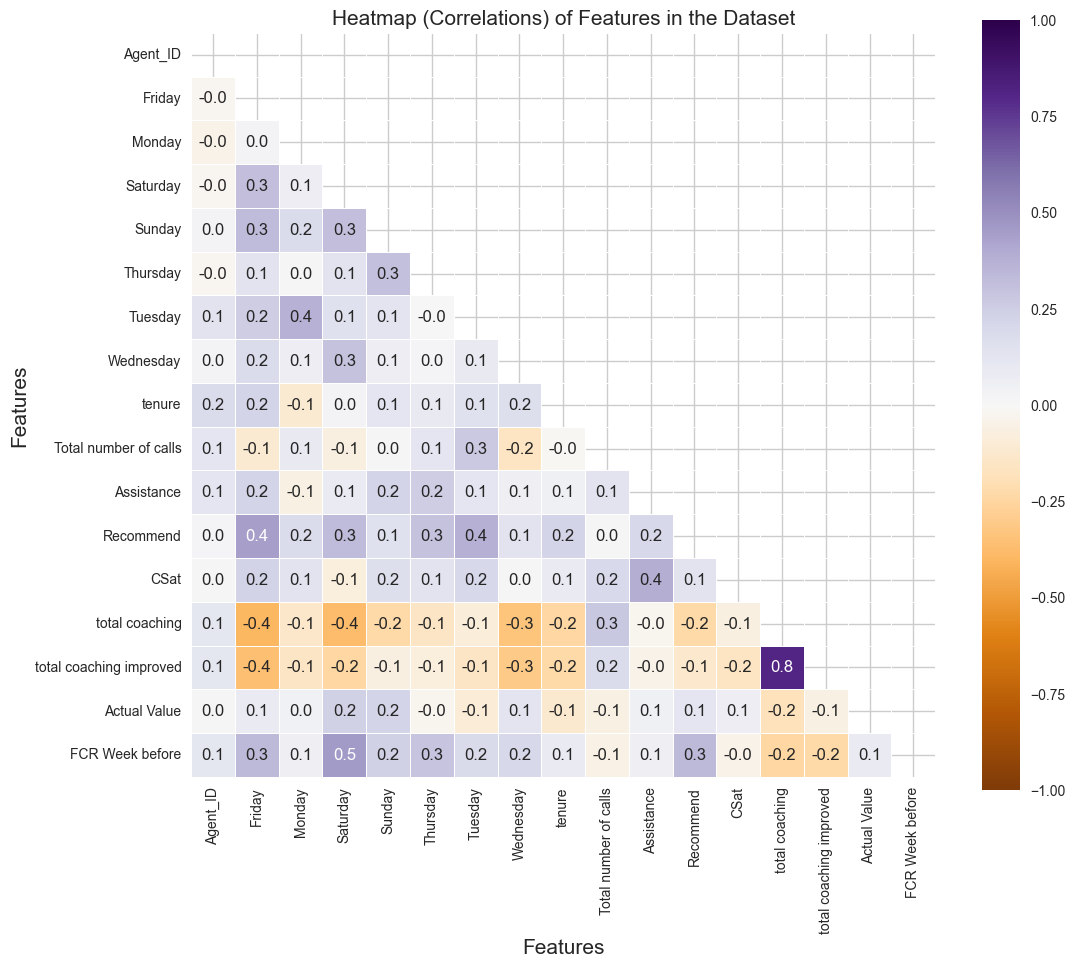

In [11]:
# Create a correlation for the dataset (exclude non-numeric columns)
numeric_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset_corr = dataset[numeric_cols].corr().round(4)

# Create a correlation matrix. Only bottom left corner valued.
mask = np.zeros_like(dataset_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the correlation matrix (heatmap) using Seaborn
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(dataset_corr.round(2), mask=mask, vmax=1, center=0, vmin=-1,
                     square=True, cmap='PuOr', linewidths=.5,
                     annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()


* To understand how FCR (First Call Resolution) values vary across different days of the week, we use **KDE plots (Kernel Density Estimation)**.

* This chart shows the **distribution (or shape) of FCR for each day — Sunday to Saturday — in smooth curves**. Each curve represents how frequently certain FCR values occur for that day.

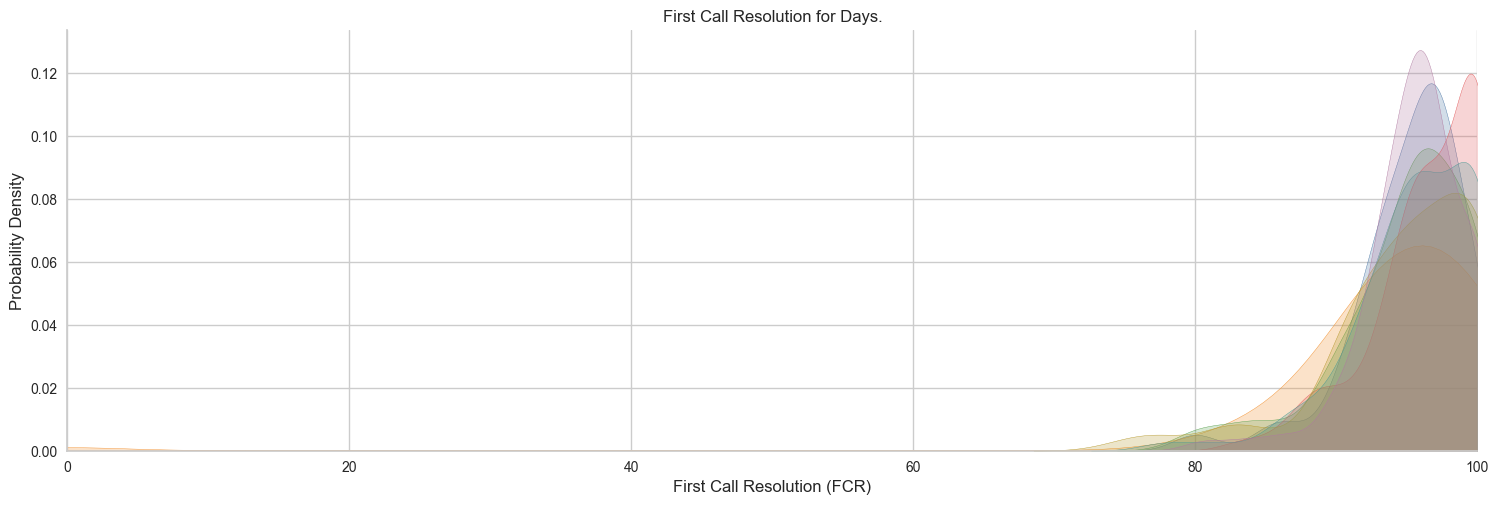

In [12]:
# Visualize the FCR for specific day in the probability density chart.
facet = sns.FacetGrid(dataset, aspect = 3, height=5)
facet.map(sns.kdeplot, 'Sunday', shade = True, color='#4E79A7')
facet.map(sns.kdeplot, 'Monday', shade = True, color='#F28E2B')
facet.map(sns.kdeplot, 'Tuesday', shade = True, color='#59A14F')
facet.map(sns.kdeplot, 'Wednesday', shade = True, color='#E15759')
facet.map(sns.kdeplot, 'Thursday', shade = True, color='#B6992D')
facet.map(sns.kdeplot, 'Friday', shade = True, color='#499894')
facet.map(sns.kdeplot, 'Saturday', shade = True, color='#B07AA1')
facet.set(xlim = (0, dataset['Thursday'].max()))
facet.add_legend()
plt.title('First Call Resolution for Days.', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.xlabel('First Call Resolution (FCR)', fontsize=12)
plt.show()

#### Step 5: Boxplot + Swarmplot: FCR Distribution by Day
This visualization helps us understand how **FCR values are spread out across each day of the week** and if there are any **outliers (unusual values)**.

In [19]:
# Visualize the dispersion of FCR values in a given day and identify the outliers.

# Create a color set that matches the probability density chart.
my_pal = {'Sunday': '#4E79A7','Monday': '#F28E2B', 'Tuesday': '#59A14F', 'Wednesday': '#E15759', 'Thursday': '#B6992D', 'Friday': '#499894', 'Saturday': '#B07AA1'}

# Generate a boxplot using Seaborn.
dataset_boxplot = pd.DataFrame(data = dataset, columns = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.figure(figsize=(15,5))
sns.boxplot(x="value", y="variable", data=pd.melt(dataset_boxplot), color='#cccccc')
sns.swarmplot(x="value", y="variable", data=pd.melt(dataset_boxplot), palette=my_pal, alpha=0.5)
plt.title('First Call Resolution by Days.', fontsize=12)
plt.ylabel('Days', fontsize=12)
plt.xlabel('FCR', fontsize=12)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1500x500 with 0 Axes>

#### Step 6: Conduct Regression Model in Pycaret

In this step, we set up the data for **training a regression model using PyCaret**. This step prepares and transforms the data so PyCaret can find the best model to **predict the FCR (First Call Resolution)** for each agent.

🚀 Once setup is done, PyCaret gives an interactive report **showing data types, number of features, transformations applied, and more**. It's like preparing your kitchen before cooking — **clean, sort, and set up ingredients before making the dish (model)!**

In [15]:
from pycaret.regression import setup


### > ⚠️ **Note:**  
If you see an error like the one below during installation, you can **safely ignore it**. It usually doesn’t affect the model execution.

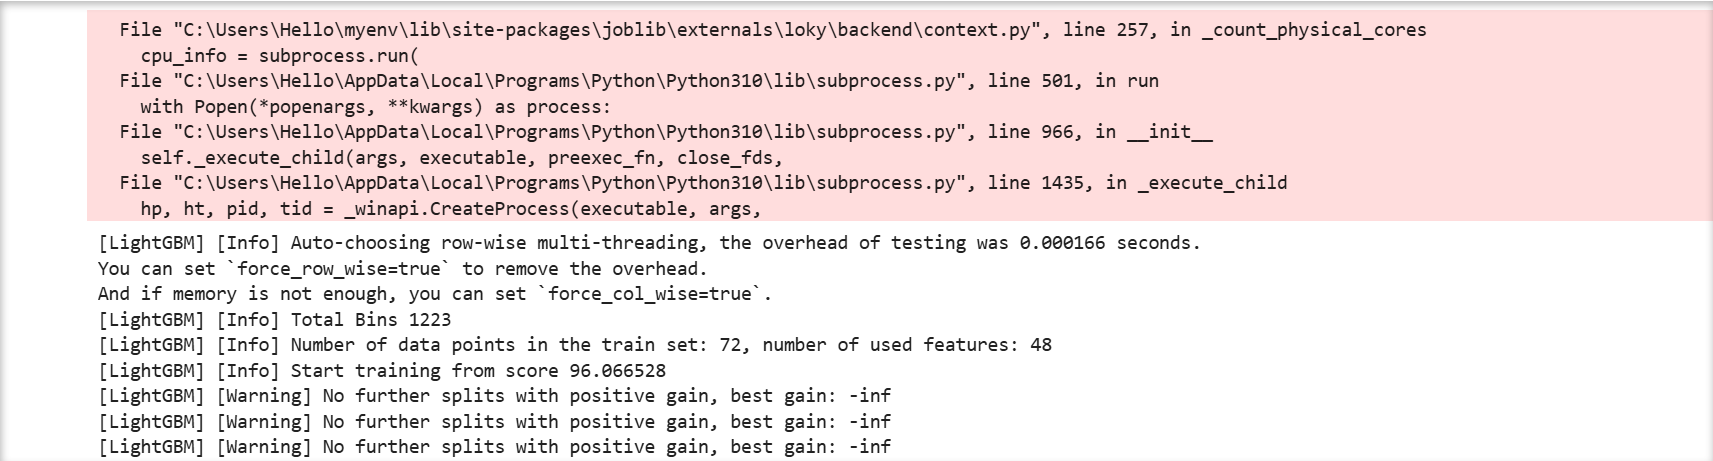


In [16]:
# Transform dataset and split the dataset
reg_fcr = setup(data=dataset,
                target='Actual Value',
                session_id=786,
                transformation=True,
                normalize=False,
                train_size=0.75,
                numeric_features=('Sunday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday', 'Friday',
                                'Total number of calls', 'CSat', 'total coaching', 'total coaching improved', 'FCR Week before'),
                remove_outliers=True,
                outliers_threshold=0.05,
                remove_multicollinearity=True,
                multicollinearity_threshold=0.9,
                feature_selection=True,
                ignore_features=['Agent_ID'],
                polynomial_features=True,
                feature_selection_method='classic',
                pca=True)


  File "C:\Users\Hello\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Hello\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 72, number of used features: 48
[LightGBM] [Info] Start training from score 96.066528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Description,Value
0,Session id,786
1,Target,Actual Value
2,Target type,Regression
3,Original data shape,"(102, 19)"
4,Transformed data shape,"(98, 4)"
5,Transformed train set shape,"(72, 4)"
6,Transformed test set shape,"(26, 4)"
7,Ignore features,1
8,Numeric features,12
9,Categorical features,2


In [18]:
from pycaret.regression import *  # Make sure to import the regression module

# Initialize setup with your dataset
regression_setup = setup(data=dataset, target='Actual Value', session_id=786)

# Now you can call the models function
available_models = models()


,Description,Value
0,Session id,786
1,Target,Actual Value
2,Target type,Regression
3,Original data shape,"(102, 19)"
4,Transformed data shape,"(102, 19)"
5,Transformed train set shape,"(71, 19)"
6,Transformed test set shape,"(31, 19)"
7,Numeric features,16
8,Categorical features,2
9,Preprocess,True


In [19]:
# Below is a list of models that Pycaret can use for regression. The ID for each regression can be used to include or exclude models for various functions.
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [20]:
# We can do a compare_models() function without assigning it to a variable. However, we have top 5 models selected using n_select and assigning it to top5 variable. We plan to use this for Stacking and Blending purposes. We have excluded 'RANSAC' (Random Sample Consensus) and 'KNN' (K-Nearest Neighbor) models and have adjusted the default fold value from 10 to 5.
top5 = compare_models(n_select=5, exclude=(['ransac', 'knn']), sort='RMSE', fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,4.7088,38.3752,6.1628,-0.0874,0.0673,0.0518,0.0560
omp,Orthogonal Matching Pursuit,4.7524,38.5575,6.1725,-0.0878,0.0674,0.0523,0.0600
br,Bayesian Ridge,4.7522,38.5607,6.1728,-0.0879,0.0674,0.0523,0.0580
et,Extra Trees Regressor,4.8790,40.3065,6.3131,-0.2150,0.0685,0.0529,0.1380
rf,Random Forest Regressor,4.8885,40.6380,6.3287,-0.2297,0.0686,0.0530,0.1720
ada,AdaBoost Regressor,4.7634,42.5894,6.4764,-0.2781,0.0707,0.0525,0.1260
lightgbm,Light Gradient Boosting Machine,5.1259,45.1109,6.7128,-0.3597,0.0729,0.0561,0.1800
lasso,Lasso Regression,5.2919,48.6663,6.9438,-0.4209,0.0754,0.0578,0.0600
llar,Lasso Least Angle Regression,5.2919,48.6661,6.9438,-0.4209,0.0754,0.0578,0.1080
gbr,Gradient Boosting Regressor,5.0489,50.0055,6.9718,-0.6505,0.0758,0.0547,0.0980


In [21]:
# Sometimes you want to include the output of the compare_models() as a screenshot into a report. However, with the yellow highlights it gets difficult to read. Pycaret has thought of that and you can use the pull() function to show the model results in the sort by or ascending order.
pull().sort_values(by='RMSE', ascending=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dummy,Dummy Regressor,4.7088,38.3752,6.1628,-0.0874,0.0673,0.0518,0.056
omp,Orthogonal Matching Pursuit,4.7524,38.5575,6.1725,-0.0878,0.0674,0.0523,0.060
br,Bayesian Ridge,4.7522,38.5607,6.1728,-0.0879,0.0674,0.0523,0.058
et,Extra Trees Regressor,4.8790,40.3065,6.3131,-0.2150,0.0685,0.0529,0.138
rf,Random Forest Regressor,4.8885,40.6380,6.3287,-0.2297,0.0686,0.0530,0.172
ada,AdaBoost Regressor,4.7634,42.5894,6.4764,-0.2781,0.0707,0.0525,0.126
lightgbm,Light Gradient Boosting Machine,5.1259,45.1109,6.7128,-0.3597,0.0729,0.0561,0.180
llar,Lasso Least Angle Regression,5.2919,48.6661,6.9438,-0.4209,0.0754,0.0578,0.108
lasso,Lasso Regression,5.2919,48.6663,6.9438,-0.4209,0.0754,0.0578,0.060
gbr,Gradient Boosting Regressor,5.0489,50.0055,6.9718,-0.6505,0.0758,0.0547,0.098


Now that we've set up our data, it's time to **fine-tune the top-performing models** to improve their performance even more.

✅ **What we are doing:**
* Create a list tuned_top5 to store our tuned models.

* Loop through the top 5 models identified earlier.

* Use tune_model() to optimize each model for best performance.

* Handle exceptions in case a model doesn’t support tuning (e.g., some tree-based models).

* Store the tuned model, or the original if tuning fails.

**📌 Result:** A list of the best-tuned models — ready to predict FCR more accurately!

In [22]:
# Create a list to store tuned models
tuned_top5 = []

# Iterate through top5 models and tune those that support it
for model in top5:
    try:
        tuned_model = tune_model(model, n_iter=120, optimize='RMSE', fold=5)
        tuned_top5.append(tuned_model)
    except ValueError as e:
        print(f"Skipping tuning for {type(model).__name__} - {str(e)}")
        tuned_top5.append(model)  # Add original model if tuning not supported

print("\nTuned models (or original if tuning not supported):")
for model in tuned_top5:
    print(type(model).__name__)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:11:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Regressor


Skipping tuning for DummyRegressor - parameter grid for tuning is empty. If passing custom_grid, make sure that it is not empty. If not passing custom_grid, the passed estimator does not have a built-in tuning grid.


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4775,36.5070,6.0421,0.0071,0.0658,0.0490
1,4.9833,41.6225,6.4515,-0.0366,0.0703,0.0554
2,4.2831,42.2171,6.4975,-0.0192,0.0735,0.0491
3,4.6002,24.4202,4.9417,-0.3294,0.0513,0.0474
4,5.4179,48.0209,6.9297,-0.0609,0.0761,0.0606
Mean,4.7524,38.5575,6.1725,-0.0878,0.0674,0.0523
Std,0.4038,7.9550,0.6766,0.1228,0.0088,0.0049


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4789,36.5216,6.0433,0.0067,0.0659,0.0491
1,4.9783,41.5995,6.4498,-0.0360,0.0703,0.0553
2,4.2796,42.2118,6.4971,-0.0191,0.0735,0.0490
3,4.6023,24.4403,4.9437,-0.3305,0.0513,0.0475
4,5.4130,47.9467,6.9244,-0.0593,0.0760,0.0605
Mean,4.7504,38.5440,6.1716,-0.0876,0.0674,0.0523
Std,0.4021,7.9272,0.6744,0.1233,0.0087,0.0049


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.8473,40.7391,6.3827,-0.1080,0.0694,0.0531
1,4.4524,32.1522,5.6703,0.1993,0.0617,0.0486
2,4.6103,53.1141,7.2879,-0.2823,0.0814,0.0531
3,4.6209,26.2045,5.1190,-0.4265,0.0531,0.0474
4,4.9949,33.6229,5.7985,0.2572,0.0634,0.0547
Mean,4.7052,37.1666,6.0517,-0.0721,0.0658,0.0514
Std,0.1919,9.2191,0.7372,0.2658,0.0094,0.0028


Fitting 5 folds for each of 120 candidates, totalling 600 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4127,33.3912,5.7785,0.0919,0.0632,0.0485
1,4.5186,37.2462,6.1030,0.0724,0.0670,0.0508
2,4.7925,55.8264,7.4717,-0.3478,0.0834,0.0554
3,4.3163,22.2946,4.7217,-0.2137,0.0490,0.0445
4,4.6328,36.5500,6.0457,0.1925,0.0669,0.0520
Mean,4.5346,37.0617,6.0241,-0.0409,0.0659,0.0502
Std,0.1667,10.8069,0.8785,0.2044,0.0110,0.0036


Fitting 5 folds for each of 120 candidates, totalling 600 fits

Tuned models (or original if tuning not supported):
DummyRegressor
OrthogonalMatchingPursuit
BayesianRidge
ExtraTreesRegressor
RandomForestRegressor


In [23]:
# Blending models is an ensemble method of combining different machine learning algorithms and use a majority vote to build consensus of final prediction values. Let's try building a blending model from our top 5 models and evaluate the results.
blender_specific = blend_models(estimator_list=tuned_top5[0:], fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.4314,35.7747,5.9812,0.0270,0.0653,0.0486
1,4.5942,37.3820,6.1141,0.0690,0.0669,0.0511
2,4.2509,45.8524,6.7714,-0.1070,0.0763,0.0491
3,4.5191,23.6291,4.8610,-0.2863,0.0504,0.0465
4,5.0756,41.2539,6.4229,0.0886,0.0708,0.0566
Mean,4.5742,36.7784,6.0301,-0.0417,0.0659,0.0504
Std,0.2756,7.4383,0.6450,0.1400,0.0087,0.0034


In [24]:
# Below is a view of the model parameters.
blender_specific

VotingRegressor(estimators=[('Dummy Regressor', DummyRegressor()),
                            ('Orthogonal Matching Pursuit',
                             OrthogonalMatchingPursuit()),
                            ('Bayesian Ridge',
                             BayesianRidge(alpha_1=0.3, alpha_2=0.1,
                                           lambda_1=0.2, lambda_2=1e-07)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(max_depth=11,
                                                 min_impurity_decrease=0.3,
                                                 min_samples_leaf=2,
                                                 min_samples_split=5,
                                                 n_estimators=200, n_jobs=-1,
                                                 random_state=786)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(criterion='absolute_error',
         

In [25]:
# Stacking models is an ensemble method of using meta learning, where a meta model is created using multiple base estimators to generate the final prediction. Let's try building a stacking model from our top 5 models and evaluate the results.
stacker_specific = stack_models(estimator_list=tuned_top5[1:], meta_model=tuned_top5[0], fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5150,36.9948,6.0823,-0.0062,0.0663,0.0495
1,4.8399,41.2688,6.4241,-0.0278,0.0701,0.0540
2,4.2687,42.4171,6.5128,-0.0240,0.0736,0.0489
3,4.6505,24.9199,4.9920,-0.3566,0.0518,0.0480
4,5.2700,46.2755,6.8026,-0.0223,0.0748,0.0589
Mean,4.7088,38.3752,6.1628,-0.0874,0.0673,0.0518
Std,0.3367,7.3495,0.6289,0.1348,0.0083,0.0041


In [26]:
# Below is a view of the model parameters.
stacker_specific

StackingRegressor(cv=5,
                  estimators=[('Orthogonal Matching Pursuit',
                               OrthogonalMatchingPursuit()),
                              ('Bayesian Ridge',
                               BayesianRidge(alpha_1=0.3, alpha_2=0.1,
                                             lambda_1=0.2, lambda_2=1e-07)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(max_depth=11,
                                                   min_impurity_decrease=0.3,
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   n_estimators=200, n_jobs=-1,
                                                   random_state=786)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(criterion='absolute_error',
                        

#### Step 7: Evaluate Results and Finalize Model

This step involves evaluating the performance of the trained models by **analyzing various diagnostic plots and generating predictions**. Here's a breakdown:

### Plotting Model Diagnostics:

* The plot_model() function is used to generate diagnostic plots to visually assess the performance of the models.
* For example: Cook's Distance and t-SNE plots to check for outliers and visualize the data distribution.
* Residuals, Prediction Error, and Learning Plots to compare the performance of two models (blender and stacker) side by side.
* These plots help identify issues like overfitting, underfitting, or irregularities in model predictions.

In [28]:
# We can use Pycaret's built in plot_model() function to generate side-by-side plots: the Cook's Distance Outliers and t-SNE Manifold charts.
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(5,2,1)
plot_model(blender_specific, plot='cooks', save=True, verbose=False, scale=1.1)
ax = fig.add_subplot(5,2,2)
plot_model(blender_specific, plot='manifold', save=True, verbose=False, scale=1.1)
plt.savefig('plots_cooks_and_manifold.png', dpi=300, pad_inches=0.25)
plt.show()

<Figure size 800x550 with 0 Axes>

#### Step 8: Prediction:

The predict_model() function generates **predicted values based on the trained models** (blender_specific and stacker_specific).

This step allows us to evaluate how well the models generalize to new data.

In [33]:
# We can use Pycaret's built in plot_model() function to generate side-by-side plots: the Residuals chart, Prediction Error and Cross Validation (learning) charts. Let's compare the Blend and Stack model plots in a side-by-side comparison.
fig = plt.figure(figsize=(25,20))
ax = fig.add_subplot(3,2,1)
plot_model(blender_specific, plot='residuals', save=True, verbose=False, scale=1.1)
ax = fig.add_subplot(3,2,2)
plot_model(stacker_specific, plot='residuals', save=True, verbose=False, scale=1.1)
ax = fig.add_subplot(3,2,3)
plot_model(blender_specific, plot='error', save=True, verbose=False, scale=1.1)
ax = fig.add_subplot(3,2,4)
plot_model(stacker_specific, plot='error', save=True, verbose=False, scale=1.1)
ax = fig.add_subplot(3,2,5)
plot_model(blender_specific, plot='learning', save=True, verbose=False, scale=1.1)
ax = fig.add_subplot(3,2,6)
plot_model(stacker_specific, plot='learning', save=True, verbose=False, scale=1.1)
plt.savefig('plots_blender_vs_stacker.png', dpi=300, pad_inches=0.25)
plt.show()

<Figure size 800x550 with 0 Axes>

In [34]:
# We can execute the predict_model() function to use the model to generate the predicted values.
pred_tunded_blender = predict_model(blender_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,3.9579,20.2987,4.5054,-0.1438,0.0472,0.0413


In [35]:
# We can execute the predict_model() function to use the model to generate the predicted values.
pred_tunded_stacker = predict_model(stacker_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,4.0388,20.4397,4.5210,-0.1517,0.0472,0.0420


#### Step 9: Interactive Prediction with Gradio:

Gradio is used to create an **interactive interface for making real-time predictions**. Users input values, and the model predicts employee performance based on the trained model.

This user-friendly interface makes it **easy to deploy the model for real-world applications**.

In [4]:
import sys
!{sys.executable} -m pip install gradio --upgrade


In [1]:
!pip install gradio
!pip install --upgrade gradio
import gradio as gr
import pandas as pd

# Define the prediction function using the `blender_specific` model
def make_prediction(Friday, Monday, Saturday, Sunday, Thursday, Tuesday, Wednesday,
                    Site, Function_Field, tenure, Total_number_of_calls, Assistance,
                    Recommend, CSat, total_coaching, total_coaching_improved, FCR_Week_before):
    
    input_data = pd.DataFrame({
        'Friday': [Friday],
        'Monday': [Monday],
        'Saturday': [Saturday],
        'Sunday': [Sunday],
        'Thursday': [Thursday],
        'Tuesday': [Tuesday],
        'Wednesday': [Wednesday],
        'Site': [Site],
        'Function_Field': [Function_Field],
        'tenure': [tenure],
        'Total number of calls': [Total_number_of_calls],
        'Assistance': [Assistance],
        'Recommend': [Recommend],
        'CSat': [CSat],
        'total coaching': [total_coaching],
        'total coaching improved': [total_coaching_improved],
        'FCR Week before': [FCR_Week_before]
    })

    # Ensure correct data types
    input_data = input_data.astype({
        'Friday': 'float32',
        'Monday': 'float32',
        'Saturday': 'float32',
        'Sunday': 'float32',
        'Thursday': 'float32',
        'Tuesday': 'float32',
        'Wednesday': 'float32',
        'Site': 'category',
        'Function_Field': 'category',
        'tenure': 'int8',
        'Total number of calls': 'int32',
        'Assistance': 'float32',
        'Recommend': 'float32',
        'CSat': 'float32',
        'total coaching': 'int8',
        'total coaching improved': 'int8',
        'FCR Week before': 'float32'
    })

    # Align with model input
    input_data = input_data.reindex(columns=blender_specific.feature_names_in_, fill_value=0)

    # Make prediction
    prediction = blender_specific.predict(input_data)
    return prediction[0]

# Create Gradio interface
iface = gr.Interface(
    fn=make_prediction,
    inputs=[
        gr.Number(value=95.0, label="Friday"),
        gr.Number(value=90.0, label="Monday"),
        gr.Number(value=92.0, label="Saturday"),
        gr.Number(value=94.0, label="Sunday"),
        gr.Number(value=93.0, label="Thursday"),
        gr.Number(value=91.0, label="Tuesday"),
        gr.Number(value=92.0, label="Wednesday"),
        gr.Dropdown(choices=["Kuala Lumpur", "Santiago"], value="Kuala Lumpur", label="Site"),
        gr.Dropdown(choices=["Agent"], value="Agent", label="Function_Field"),
        gr.Number(value=10, label="tenure"),
        gr.Number(value=150, label="Total number of calls"),
        gr.Number(value=95.0, label="Assistance"),
        gr.Number(value=94.0, label="Recommend"),
        gr.Number(value=4.8, label="CSat"),
        gr.Number(value=1, label="total coaching"),
        gr.Number(value=1, label="total coaching improved"),
        gr.Number(value=90.0, label="FCR Week before")
    ],
    outputs="number",
    title="Employee Performance Prediction",
    description="Enter the values to predict the employee's performance."
)

# Launch the app
iface.launch()


* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


### Conclusion
In this lab, we've built and evaluated a **regression model using PyCaret to predict First Call Resolution (FCR)** for call center agents. 
We explored **the dataset, applied machine learning techniques, and learned how predicting FCR** can enhance performance management and improve service quality. 
Machine learning can be a powerful tool to solve **real-world business challenges**, such as improving call center efficiency and customer satisfaction.
